## 아이리스 다중 분류

In [1]:
import pandas as pd
df = pd.read_csv('../dataset/iris.csv', 
                 names = ["sepal_length", "sepal_width", "petal_length", "petal_width", "species"])
df.head()

sepal_length  sepal_width  petal_length  petal_width      species
0           5.1          3.5           1.4          0.2  Iris-setosa
1           4.9          3.0           1.4          0.2  Iris-setosa
2           4.7          3.2           1.3          0.2  Iris-setosa
3           4.6          3.1           1.5          0.2  Iris-setosa
4           5.0          3.6           1.4          0.2  Iris-setosa

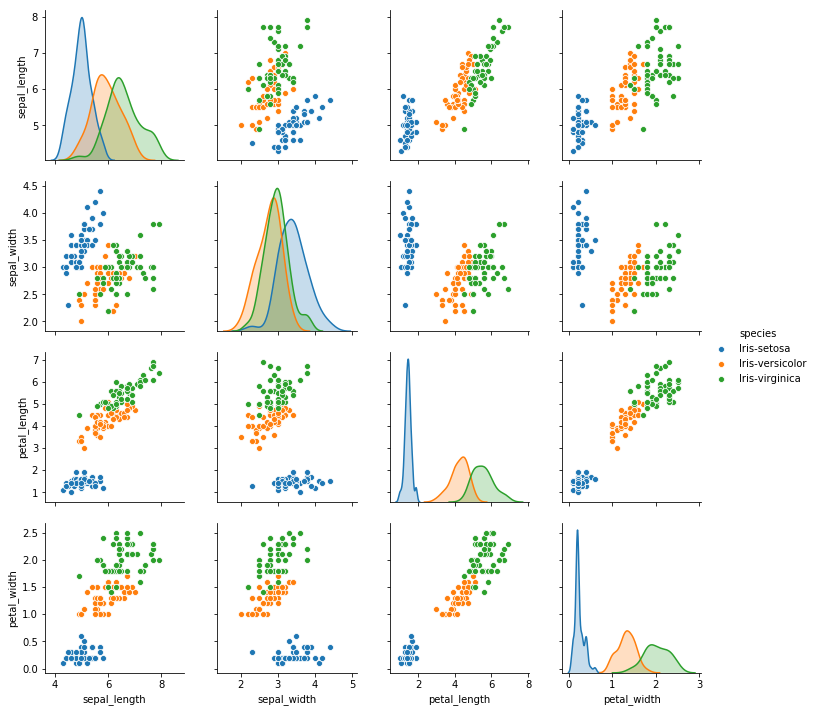

In [2]:
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

sns.pairplot(df, hue='species');
plt.show()

In [5]:
dataset = df.values
X = dataset[:,0:4].astype(float)
Y_obj = dataset[:,4]
Y_obj[0], Y_obj[50], Y_obj[100]

('Iris-setosa', 'Iris-versicolor', 'Iris-virginica')

In [6]:
from sklearn.preprocessing import LabelEncoder

e = LabelEncoder()
e.fit(Y_obj)
Y = e.transform(Y_obj)

In [7]:
Y

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [9]:
# One hot encoding
from keras.utils import np_utils

Y_encoded = np_utils.to_categorical(Y)
Y_encoded[0], Y_encoded[50], Y_encoded[100]

(array([1., 0., 0.], dtype=float32),
 array([0., 1., 0.], dtype=float32),
 array([0., 0., 1.], dtype=float32))

In [10]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers.core import Dense

In [11]:
# seed 값 설정
seed = 0
tf.set_random_seed(seed)

In [12]:
# 모델의 설정
model = Sequential()
model.add(Dense(16, input_dim=4, activation='relu'))
model.add(Dense(3, activation='softmax'))

W0809 12:29:31.267530  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0809 12:29:31.267530  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0809 12:29:31.267530  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.



In [13]:
# 모델 컴파일 
model.compile(loss='categorical_crossentropy', 
              optimizer='adam',
              metrics=['accuracy'])

# 모델 실행
model.fit(X, Y_encoded, epochs=50, batch_size=1)

W0809 12:30:54.799489  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0809 12:30:54.898494  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:3295: The name tf.log is deprecated. Please use tf.math.log instead.

W0809 12:30:54.975499  6236 deprecation.py:323] From C:\ProgramData\Anaconda3\lib\site-packages\tensorflow\python\ops\math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0809 12:30:55.016501  6236 deprecation_wrapper.py:119] From C:\ProgramData\Anaconda3\lib\site-packages\keras\backend\tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v

Epoch 1/50
150/150 [==============================] - 0s 2ms/step - loss: 1.5141 - acc: 0.3333
Epoch 2/50
150/150 [==============================] - 0s 613us/step - loss: 0.9874 - acc: 0.4467
Epoch 3/50
150/150 [==============================] - 0s 613us/step - loss: 0.7770 - acc: 0.6667
Epoch 4/50
150/150 [==============================] - 0s 640us/step - loss: 0.6437 - acc: 0.7067
Epoch 5/50
150/150 [==============================] - 0s 653us/step - loss: 0.5573 - acc: 0.7733
Epoch 6/50
150/150 [==============================] - 0s 660us/step - loss: 0.5054 - acc: 0.7733
Epoch 7/50
150/150 [==============================] - 0s 700us/step - loss: 0.4650 - acc: 0.8667
Epoch 8/50
150/150 [==============================] - 0s 593us/step - loss: 0.4344 - acc: 0.8333
Epoch 9/50
150/150 [==============================] - 0s 620us/step - loss: 0.4181 - acc: 0.8533
Epoch 10/50
150/150 [==============================] - 0s 607us/step - loss: 0.3905 - acc: 0.9067
Epoch 11/50
150/150 [==========

In [14]:
# 결과 출력 
print("\n Accuracy: %.4f" % (model.evaluate(X, Y_encoded)[1]))

150/150 [==============================] - 0s 267us/step

 Accuracy: 0.9733
